In [1]:
%pylab inline
import h5py 
import programas as pg
import pandas as pd
import grispy as gsp

Populating the interactive namespace from numpy and matplotlib


In [2]:
file = h5py.File('/mnt/projects/bias_mock/galpos_RedSample.hdf5','r')
pos = file['Subhalo/SubhaloPos'][()]
v0 = np.loadtxt('sphvds_raul-0.8.dat')
centres = v0[:,2:5]

Lbox = 1440
grid = gsp.GriSPy(pos, N_cells=32)
periodic = {0: (0, Lbox), 1: (0, Lbox), 2: (0, Lbox)}
grid.set_periodicity(periodic, inplace=True)

In [23]:
bines = 40
rmin = 0
rmax = 5
#bineado = np.logspace(np.log10(rmin),np.log10(rmax),bines) 
bineado = np.linspace(rmin,rmax,bines)

npart = len(pos)
rhomean = npart/Lbox**3

id_void = 2000

centres = v0[id_void,2:5]
rvoid = v0[id_void,1]
x = centres[0]
y = centres[1]
z = centres[2]

print('void position:',x,y,z)
perfil = pg.profile(x,y,z,rvoid,grid,bines,bineado)
volumen = pg.profile_volume(rvoid,bines,bineado)

delta = ((perfil/volumen)-rhomean)/rhomean

void position: 817.6707153320312 1430.019287109375 144.5857696533203


In [24]:
v = v0[:,2:5]
sel, = np.where((v[:,0]<30) & (v[:,1]<30))

In [29]:
def numero_de_puntos(distance):
    nmin = 8
    if distance < 1:
        p = nmin
    if distance >= 1:    
        p = int(nmin*distance**2)
        
    return p

def perfil_interpolado(x,y,z,bineado,rvoid,field,bin_size):
    
    ngrid = field.shape[0]
    #puntos = 80
    perfil = np.zeros(bineado.shape[0] - 1)
    
    i = 0
    delta = bineado[1] - bineado[0]
    rmin = bineado - delta/2.0
    rmax = bineado + delta/2.0
    for radio in bineado[1:]:
        
        #print('distance:',radio)
        puntos = numero_de_puntos(radio)
        posx, posy, posz = pg.fibo_points(x,y,z,radio*rvoid,puntos,ngrid)
        
        field_count = []
        #print('puntos:',puntos)
        for j in range(puntos):
            
            px = posx[j]
            py = posy[j]
            pz = posz[j]
            
            field_value = pg.interpolador(px,py,pz,field,bin_size)*bin_size**3 / ((4)*np.pi*(radio*rvoid)**2 )#((rmax[i+1]*rvoid)**3 - (rmin[i+1]*rvoid)**3 ))
            field_count.append(field_value)
            #print('posiciones:',px,py,pz,'field:',field_value)
        
        perfil[i] = np.mean(field_count)
        i = i + 1
        
    return perfil

In [30]:
field_name = 'rhogal_eul_bias_expansion'
field = np.load('/mnt/projects/bias_mock/'+field_name+'.npy')

rhomean_field = np.mean(field)
ngrid = field.shape[0]
lbox = 1440
bin_size = lbox/ngrid

perfil_field = perfil_interpolado(x, y, z, bineado, rvoid, field, bin_size)

delta_field = (perfil_field - rhomean_field)/rhomean_field

In [31]:
perfil_field

array([-0.14491848, -0.02278343, -0.00718408,  0.00157705,  0.00087711,
        0.00108344,  0.0017537 ,  0.00215766,  0.00100242,  0.00338415,
        0.00309819,  0.00191746,  0.00189374,  0.00107942,  0.00097362,
        0.0009902 ,  0.00091083,  0.00084344,  0.00095883,  0.00056319,
        0.00077352,  0.00058852,  0.00065685,  0.00070336,  0.00046674,
        0.00046242,  0.0006066 ,  0.0005234 ,  0.00053102,  0.00037408,
        0.00041828,  0.00025426,  0.00026979,  0.00024084,  0.00024564,
        0.00023733,  0.00024347,  0.00020049,  0.00020241])

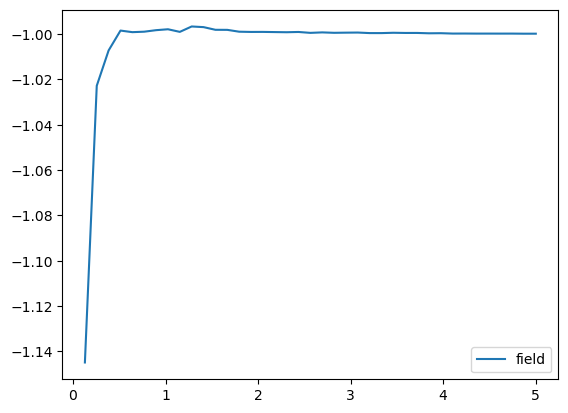

In [32]:
#plt.plot(bineado[1:],delta,label='particles')
plt.plot(bineado[1:],delta_field,label='field')
plt.legend()

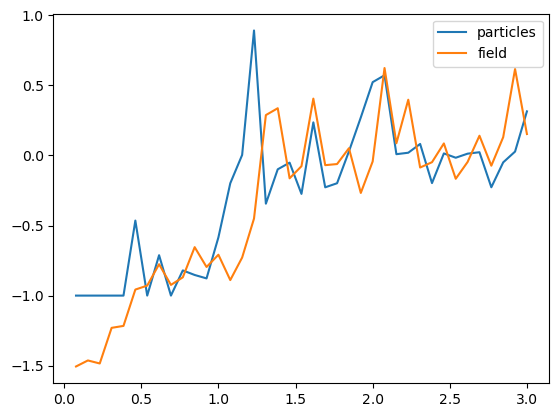

In [61]:
plt.plot(bineado[1:],delta,label='particles')
plt.plot(bineado[1:],delta_field,label='field')
plt.legend()

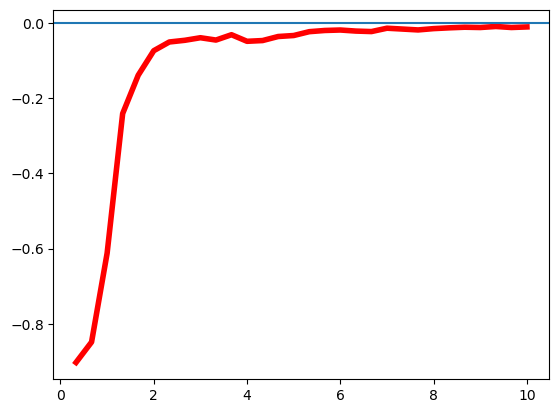

In [73]:
df = pd.read_csv('perfiles_interp_rhogal_eul_bias_gaus_pruebas.csv')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']

field = np.load('/mnt/projects/bias_mock/rhogal_eul_bias_gaus.npy')
rhomean = np.mean(field)
delta = (mean - rhomean)/rhomean
delta_q25 = (q25 - rhomean)/rhomean
delta_q75 = (q75 - rhomean)/rhomean

plt.plot(dist,delta,color='red',lw=4,label='rhogal_gaus')
#plt.fill_between(dist,delta_q25,delta_q75,color='red',alpha=.3)

plt.axhline(y = 0)

## analizo perfiles en los bordes

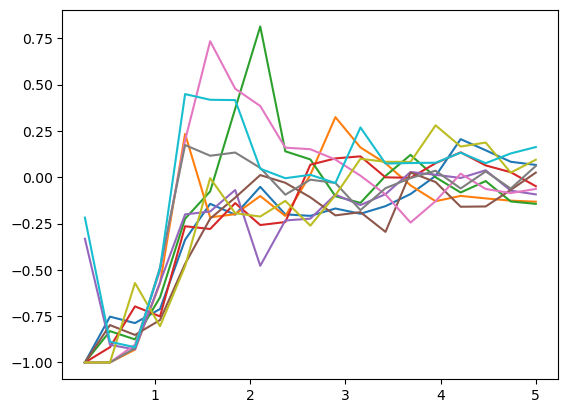

In [43]:
v = v0[:,2:5]
sel, = np.where((v[:,0]<30) & (v[:,1]<30))
rhomean = npart/Lbox**3

bines = 20
rmin = 0
rmax = 5
#bineado = np.logspace(np.log10(rmin),np.log10(rmax),bines) 
bineado = np.linspace(rmin,rmax,bines)

for id_void in sel:
    centres = v0[id_void,2:5]
    rvoid = v0[id_void,1]
    x = centres[0]
    y = centres[1]
    z = centres[2]
    
    perfil = pg.profile(x,y,z,rvoid,grid,bines,bineado)
    volumen = pg.profile_volume(rvoid,bines,bineado)
    delta = ((perfil/volumen)-rhomean)/rhomean
    
    plt.plot(bineado[1:],delta)

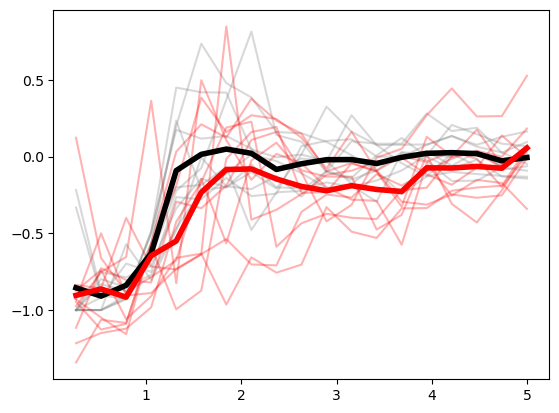

In [52]:
v = v0[:,2:5]
sel, = np.where((v[:,0]<30) & (v[:,1]<30))
rhomean = npart/Lbox**3

bines = 20
rmin = 0
rmax = 5
#bineado = np.logspace(np.log10(rmin),np.log10(rmax),bines) 
bineado = np.linspace(rmin,rmax,bines)

delta_lag = np.zeros([bines-1,len(sel)])
k = 0
for id_void in sel:
    centres = v0[id_void,2:5]
    rvoid = v0[id_void,1]
    x = centres[0]
    y = centres[1]
    z = centres[2]
    
    perfil = pg.profile(x,y,z,rvoid,grid,bines,bineado)
    volumen = pg.profile_volume(rvoid,bines,bineado)
    delta = ((perfil/volumen)-rhomean)/rhomean
    delta_lag[:,k] = delta
    
    plt.plot(bineado[1:],delta,color='grey',alpha=.3)
    k = k + 1
    
field_name = 'rhogal_eul_bias_expansion'
field = np.load('/mnt/projects/bias_mock/'+field_name+'.npy')

rhomean_field = np.mean(field)
ngrid = field.shape[0]
lbox = 1440
bin_size = lbox/ngrid
delta_eul = np.zeros([bines-1,len(sel)])
k = 0
for id_void in sel:
    centres = v0[id_void,2:5]
    rvoid = v0[id_void,1]
    x = centres[0]
    y = centres[1]
    z = centres[2]
    perfil_field = perfil_interpolado(x, y, z, bineado, rvoid, field, bin_size)
    delta_field = (perfil_field - rhomean_field)/rhomean_field
    delta_eul[:,k] = delta_field
    
    plt.plot(bineado[1:],delta_field,color='red',alpha=.3)
    k = k + 1
    
plt.plot(bineado[1:],pg.mean_profile(delta_lag),color='black',lw=4)
plt.plot(bineado[1:],pg.mean_profile(delta_eul),color='red',lw=4)

In [ ]:
id_void = 
rvoid = v0[id_void,1]
x = centres[0]
y = centres[1]
z = centres[2]